# __ALTSCHOOL CAPSTONE PROJECT__
#### PROJECT BY: Oladokun Sunday
#### STUDENT ID: ALT/SOD/023/1113 

# __PROJECT BRIEF__

#### __Project Title:__

Predictive modelling of house prices

#### __Project Overview:__ 

In this capstone project, I applied my data science and machine learning skills to develop a predictive model for house prices. It involved data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. Using a real-world dataset, I built a model that accurately predicts house prices based on various features.

#### __Problem Statement:__

Predicting house prices accurately is a significant challenge in the real estate market due to the numerous factors influencing property values. Accurate predictions can greatly benefit buyers, sellers, real estate agents, and financial institutions by providing a reliable estimate of property values. This project would help to develop a robust machine learning model that can predict house prices based on various features of the houses and solve the problem mentioned earlier.

#### __Project General Objective:__
    
The objective is to accurately predict house prices using machine learning models and identify the most effective approach.

#### __Project Specific Objectives:__
    
Perform data cleaning and exploratory data analysis (EDA) to prepare and understand the dataset.

Engineer features and encode variables to enhance the model's predictive capabilities.

Train, evaluate, and optimize multiple machine learning models to select the best-performing one for predicting house prices.

#### __Data Collection:__

The dataset used in this project, "Housing Sales: Factors Influencing Sale Prices" from Kaggle, it is a detailed collection of housing sales data, organized in a CSV (Comma-Separated Values) format. Each row represents a unique property sale, while the columns provide a wealth of information on various property attributes. These attributes include lot size, building type, house style, condition ratings, year of construction, amenities, and sale prices. This dataset is ideal for analyzing real estate market trends, understanding how property characteristics and location influence sale prices, and building predictive models for housing sales.

The dataset can be accessed here: https://www.kaggle.com/datasets/rohit265/housing-sales-factors-influencing-sale-prices

### __IMPORT NECESSARY LIBRARIES__

In [1]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Importing libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Importing libraries for model evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### __IMPORT DATASET__

In [2]:
# Import the data
df = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\Project--Third-Semester-\housing.csv")

In [3]:
# View the first five rows in the dataset to confirm what I imported
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [4]:
# Checking the size of the dataset
df.shape

(2413, 18)

### __GENERAL OVERVIEW OF THE DATASET__

#### **Getting a first look at the contents of the dataset**

In [5]:
# Check the first five rows
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


#### **How large is the dataset that we are working with?**

In [7]:
# Check the size of the dataset
data_size = df.shape

print(f'The training set has {data_size[0]} rows (observations) and {data_size[-1]} columns (features)')

The training set has 2413 rows (observations) and 18 columns (features)


#### **What are the different features contained in our dataset?**

In [8]:
# Check the different features(columns) and their respective descriptions
columns = list(df.columns)
print(columns)

['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


This is a brief description of all the features contained in our dataset:

Lot_Frontage: Linear feet of street connected to the property.

Lot_Area: Lot size in square feet.

Bldg_Type: Type of building (e.g., single-family, multi-family).

House_Style: Style of the house (e.g., ranch, two-story).

Overall_Cond: Overall condition rating of the house.

Year_Built: Year the house was built.

Exter_Cond: Exterior condition rating of the house.

Total_Bsmt_SF: Total square feet of basement area.

First_Flr_SF: First-floor square feet.

Second_Flr_SF: Second-floor square feet.

Full_Bath: Number of full bathrooms.

Half_Bath: Number of half bathrooms.

Bedroom_AbvGr: Number of bedrooms above ground.

Kitchen_AbvGr: Number of kitchens above ground.

Fireplaces: Number of fireplaces.

Longitude: Longitude coordinates of the property location.

Latitude: Latitude coordinates of the property location.

Sale_Price: Sale price of the property. This is also the target feature this project aims to predict

#### **Statistical summary of our data**

In [9]:
# Check the general overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

In [10]:
# Check the statistical summary of the dataset- numerical features only
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,2413.0,55.462495,33.542416,0.000000,37.000000,60.000000,77.000000,313.000000
Lot_Area,2413.0,10060.208040,8222.759854,1300.000000,7390.000000,9360.000000,11404.000000,215245.000000
Year_Built,2413.0,1969.436386,29.487943,1872.000000,1953.000000,1971.000000,1998.000000,2010.000000
Total_Bsmt_SF,2413.0,1022.827600,408.977848,0.000000,784.000000,970.000000,1246.000000,3206.000000
First_Flr_SF,2413.0,1133.857024,366.442470,334.000000,866.000000,1060.000000,1350.000000,3820.000000
Second_Flr_SF,2413.0,339.242851,423.198488,0.000000,0.000000,0.000000,704.000000,1872.000000
Full_Bath,2413.0,1.539163,0.544667,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,2413.0,0.377953,0.498467,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,2413.0,2.854538,0.813430,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,2413.0,1.040199,0.200642,0.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Check the statistical summary of the dataset- Categorical features only
df.describe(include= "object").T

,count,unique,top,freq
Bldg_Type,2413,5,OneFam,2002
House_Style,2413,8,One_Story,1189
Overall_Cond,2413,9,Average,1282
Exter_Cond,2413,5,Typical,2081


### **DATA CLEANING**

#### **Correcting typographical errors and inconsistencies**

In [12]:
# View the first 5 rows of our data
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [15]:
# Extract categorical features as a list
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Extract numerical features as a list
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Print the different categories as a list
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']
Numerical features: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


For the object type features which are 4 in number, I will be inspecting them one after the other to ensure that they are all correctly filled without unnecessary characters and figures.

In [18]:
# Subset the object type features for inspection
object_data_df = df[categorical_features]

# Print the first five rows of the subsetted features
object_data_df.head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical


In [25]:
# View the unique entries in each feature to take a look at each entry for inspection against misspellings, wrong characters and typographical errors

# Loop through each feature (column) in the DataFrame containing object (categorical) data
for feature in object_data_df.columns:
    
    # Get the unique entries for the current feature
    unique_entries = object_data_df[feature].unique()
    
    # Print out the feature name and its unique entries as a list
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Bldg_Type are ['OneFam' 'TwnhsE' 'Twnhs' 'Duplex' 'TwoFmCon']
The unique entries in House_Style are ['One_Story' 'Two_Story' 'One_and_Half_Fin' 'SLvl' 'SFoyer'
 'Two_and_Half_Unf' 'One_and_Half_Unf' 'Two_and_Half_Fin']
The unique entries in Overall_Cond are ['Average' 'Above_Average' 'Good' 'Very_Good' 'Poor' 'Below_Average'
 'Excellent' 'Fair' 'Very_Poor']
The unique entries in Exter_Cond are ['Typical' 'Good' 'Fair' 'Poor' 'Excellent']


In [21]:
# Subset the numerical type features for inspection
numerical_data_df = df[numerical_features]

# Print the first five rows of the subset
numerical_data_df.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1960,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,1961,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,1958,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,1968,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,1997,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [24]:
# View the unique entries in each feature to take a look at each numerical entry for inspection against entry errors

# Loop through each feature (column) in the DataFrame containing object (categorical) data
for feature in numerical_data_df.columns:
    
    # Get the unique entries for the current feature
    unique_entries = numerical_data_df[feature].unique()
    
    # Print out the feature name and its unique entries as a list
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Lot_Frontage are [141  80  81  93  74  78  41  43  39  60  75   0  63  85  47 152 140 105
  65  70  26  21  53  24  98  90  79 110  61  36 100  67 108  59  92  58
  56  73  72  84  76  50  55  68  88 107  25  30  40  77 120 137  87 119
  64  96  71  69  52  51  57  54  86  94 124  83  82  38  44  48  66  45
  35 129  89  31  42  28  99  95  97 102 103  34 117 149 122  62 174 106
 112  32 128  91 121 144 130 109 150 113 125 101  46 104 135 136  37  22
 313  49 115 123 195  33 118 116 138 114 155 126 200 131 153 134]
The unique entries in Lot_Area are [31770 11622 14267 ...  7937  8885 10441]
The unique entries in Year_Built are [1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 1993 1990 1985 2003
 1988 1951 1978 1977 2000 1970 1971 1975 2007 2005 2004 2002 2006 1996
 1994 2009 2008 1980 1979 1984 1920 1965 1967 1963 1962 1976 1972 1966
 1959 1964 1950 1952 1949 1940 1954 1955 1957 1956 1948 1910 1927 1915
 1945 1929 1938 1928 1890 1885 1922 1925 1942 1936 1930 192

From the data description above for the various object type features in the dataset, I carefully studied the description of the data on Kaggle and fortunately, everything is in order. There is no need to strip, split of even adjust any of the entries.

#### **Ensure consistent formats (dates, time, units, labels)**

This section will be taking a look at the entries for each feature to ensure that they are entered in using the right metrics and units, especially date and time features, they mostly come as object or integer data types sometimes so there is usually a need to convert their data types and also ensure they are entered in the right format. For the units and lables, I will be using the data description file for inspection.

In [26]:
# Inspecting Year Built- the only feature that has to do with time
df[['Year_Built']]

,Year_Built
0,1960
1,1961
2,1958
3,1968
4,1997
5,1998
6,2001
7,1992
8,1995
9,1999


As we can see from the above, the only date time feature (Year Built) is an integer type. Now I understand that it might not really be necessary to convert it depending on the kind of analysis that needs to be carried out and I won't be converting this feature to datetime because of the following:

1. The conversion is not going to be effective as pandas will only convert them to 1st of January of each and we don't have further details to ensure this does not happen

2. To determine the age of each of the houses if the need arises, I can easily use a loop to subtract each year from 2024 and then append them to the dataset

Lastly, the data description file was studied as well for each of our features and they are all consistent when it comes to labels, units of measurements and standards

#### **Addressing Data Quality Issues**

Addressing data quality issues such as handling of missing values, duplicate records and outliers

In [27]:
# Identify and handle missing data.
df.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

From the above result, we can see that there are no more missig values in the dataset.

In [28]:
# Handling duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate entries in the dataset as well

In [32]:
# Handling outliers

# Recall the numerical features we created earlier
numerical_features

# Recall the numerical df we created earlier
numerical_data_df

# Recall the categorical features we created earlier
categorical_features

# Recall the numerical df we created earlier
object_data_df

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical
5,OneFam,Two_Story,Above_Average,Typical
6,TwnhsE,One_Story,Average,Typical
7,TwnhsE,One_Story,Average,Typical
8,TwnhsE,One_Story,Average,Typical
9,OneFam,Two_Story,Average,Typical


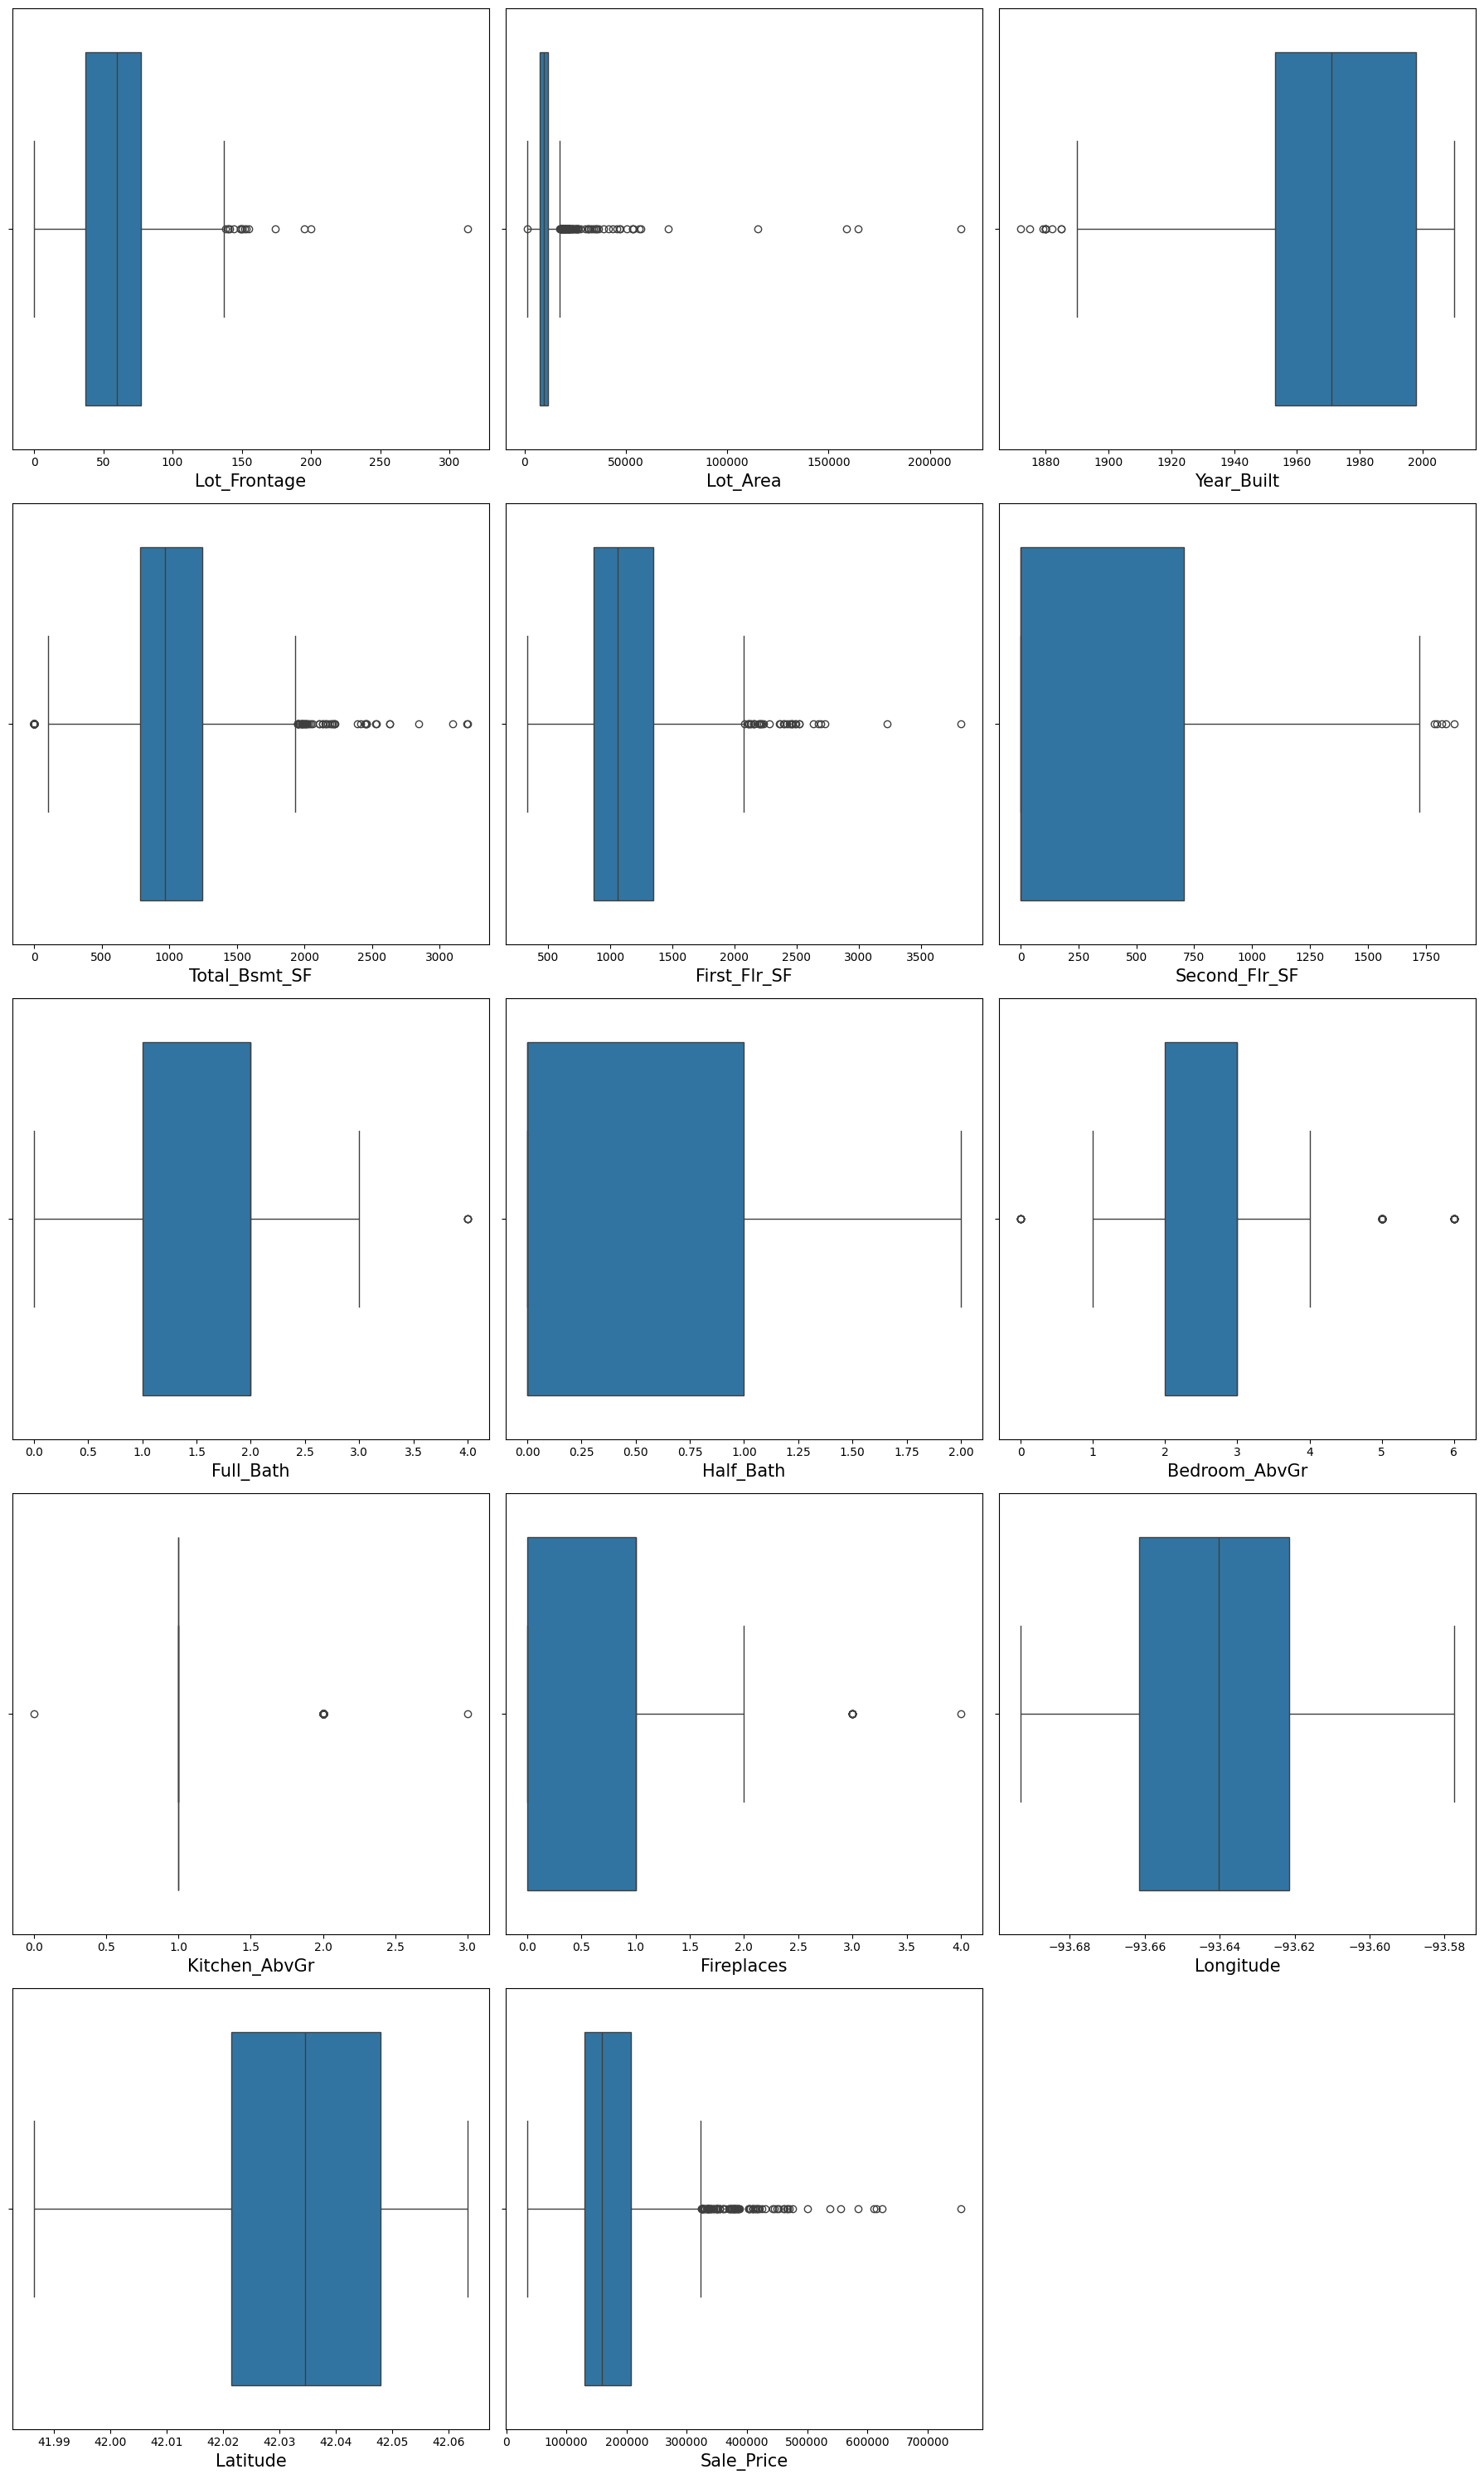

In [35]:
# Plotting the distribution of outliers using a box plot for each numerical feature 

# Number of columns in the DataFrame
num_features = len(numerical_data_df.columns)

# Calculate the number of rows and columns needed for the subplot grid
n_cols = 3
n_rows = np.ceil(num_features / n_cols).astype(int)

# Set the size of the entire figure
plt.figure(figsize=(18, 6 * n_rows))

# Iterate over each column in the DataFrame containing numerical data
for index, column in enumerate(numerical_data_df.columns):
    
    # Create a subplot in the calculated grid
    plt.subplot(n_rows, n_cols, index + 1)
    
    # Generate a boxplot for the current column
    sns.boxplot(x=numerical_data_df[column])
    
    # Set the label for the x-axis with the column name and adjust the font size
    plt.xlabel(column, fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout()

In [36]:
# Create a function for detecting outliers that can be re-used

def identify_outliers(data, column_name):
    """
    Identify outliers in a given column using the Interquartile Range (IQR) method.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: The name of the column to check for outliers.

    Returns:
    - A DataFrame containing rows where values in the specified column are considered outliers.
    """
    
    # Calculate the first quartile (25th percentile) and the third quartile (75th percentile)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify and return the outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

In [44]:
# Apply the function to the list of numerical features created earlier so as to extract outliers and then append them to a dataframe

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Apply the outlier detection function to each numerical feature
for feature in numerical_features:
    # Get outliers for the current feature
    feature_outliers = identify_outliers(df, feature)
    
    # Add a column to indicate the feature name
    feature_outliers['feature'] = feature
    
    # Append the outliers to the combined DataFrame
    outliers_df = pd.concat([outliers_df, feature_outliers])

# Reset the index of the final DataFrame
outliers_df.reset_index(drop=True, inplace=True)

# Return the DataFrame of outliers
outliers_df

# Size of the outliers in the dataset
outliers_df.shape

(561, 19)

### __SPLIT THE DATASET INTO TRAINING TEST DATASET__

Before I dive into really exploring my data, its important to split into train and test datasets for the following reasons:

Prevents data leakage: By splitting before EDA, training set is isolated from the test set, preventing any information transfer.

   
Mimics real-world scenario: this will stimulate the model to perform on unseen data

In [24]:
# Set the random seed for reproducibility
random_seed = 42

# Define the fraction of data to be used for the training set
train_fraction = 0.8

# Sample the training data
train_df = df.sample(frac=train_fraction, random_state=random_seed)

# Get the test data by dropping the training indices
test_df = df.drop(train_df.index)

In [25]:
# View the training set
train_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
765,85,10200,OneFam,One_Story,Average,2007,Typical,1578,1602,0,2,0,3,1,1,-93.684115,42.016468,293200
2387,54,13811,OneFam,One_Story,Above_Average,1987,Typical,1112,1137,0,2,0,2,1,1,-93.646099,41.999553,176000
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1833,79,9245,OneFam,Two_Story,Average,2006,Typical,939,939,858,2,1,3,1,0,-93.684137,42.014823,213500
1814,120,10356,OneFam,One_Story,Above_Average,1975,Typical,969,969,0,1,1,3,1,0,-93.684354,42.021025,122000


In [26]:
# Size of the training set
train_df.shape

(1930, 18)

In [27]:
# View the test set
test_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
11,0,7980,OneFam,One_Story,Good,1992,Good,1168,1187,0,2,0,3,1,0,-93.635951,42.057419,185000
16,152,12134,OneFam,One_and_Half_Fin,Good,1988,Typical,559,1080,672,2,0,4,1,0,-93.623595,42.060351,164000
19,105,11751,OneFam,One_Story,Above_Average,1977,Typical,1844,1844,0,2,0,3,1,1,-93.633962,42.050346,190000


In [28]:
# Size of the test set
test_df.shape

(483, 18)

### __EXPLORATORY DATA ANALYSIS__

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

The dataset has been split into training and test datasets but we will focus on the training dataset for the following reasons:

1. **Understanding Patterns**: The training dataset is what you'll use to train your model, so understanding its patterns, distributions, and relationships is crucial.

2. **Avoiding Data Leakage**: Performing EDA on the test set can lead to data leakage, where information from the test set influences the model training process, resulting in overly optimistic performance estimates.

3. **Model Validation**: The test set should be kept unseen until final model evaluation to provide an unbiased estimate of the model's performance.

The EDA will be carried out as follows to have a comprehensive overview of our dataset:
    
1. Non-Graphical Univariate Analysis
2. Graphical Univariate Analysis
3. Non-Graphical Multivariate Analysis
4. Graphical Multivariate Analysis

#### __Non-Graphical Univariate Analysis__

Kurtosis and Skew are important statistical terms to be familiar with in data science. Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.  Skew will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.

In [29]:
# Frequency distribution for categorical features
for feature in categorical_features:
    print(f"Frequency distribution for {feature}:\n{train_df[feature].value_counts()}\n")
    print(f"Proportions for {feature}:\n{train_df[feature].value_counts(normalize=True)}\n")
    print(f"Unique values for {feature}: {train_df[feature].unique()}\n")

Frequency distribution for Bldg_Type:
Bldg_Type
OneFam      1585
TwnhsE       155
Twnhs         85
Duplex        64
TwoFmCon      41
Name: count, dtype: int64

Proportions for Bldg_Type:
Bldg_Type
OneFam      0.821244
TwnhsE      0.080311
Twnhs       0.044041
Duplex      0.033161
TwoFmCon    0.021244
Name: proportion, dtype: float64

Unique values for Bldg_Type: ['OneFam' 'Twnhs' 'Duplex' 'TwnhsE' 'TwoFmCon']

Frequency distribution for House_Style:
House_Style
One_Story           958
Two_Story           576
One_and_Half_Fin    209
SLvl                 95
SFoyer               54
Two_and_Half_Unf     20
One_and_Half_Unf     14
Two_and_Half_Fin      4
Name: count, dtype: int64

Proportions for House_Style:
House_Style
One_Story           0.496373
Two_Story           0.298446
One_and_Half_Fin    0.108290
SLvl                0.049223
SFoyer              0.027979
Two_and_Half_Unf    0.010363
One_and_Half_Unf    0.007254
Two_and_Half_Fin    0.002073
Name: proportion, dtype: float64

Unique v

- Bldg_Type:

    OneFam is the most common building type, comprising 82.12% of the dataset with 1,585 occurrences.

    TwnhsE follows at 8.03% with 155 instances.

    Twnhs and Duplex represent 4.40% and 3.32% respectively, while TwoFmCon is the least common at 2.12%.

- House_Style:

    One_Story is the most prevalent house style at 49.64% with 958 occurrences.

    Two_Story is the second most common, making up 29.84% with 576 instances.

    One_and_Half_Fin is at 10.83%, while the other styles are less frequent, with Two_and_Half_Fin being the rarest at 0.21%.

- Overall_Cond:

    Average condition is most frequent, appearing in 53.89% of the records.

    Above_Average and Good follow at 19.07% and 15.18% respectively.

    Very_Good accounts for 5.18%, while Poor and Very_Poor are rare, each below 0.2%.

- Exter_Cond:

    Typical condition is dominant, representing 86.79% of the dataset with 1,675 occurrences.

    Good is the next most frequent at 10.47%.
    
    Fair and Excellent are less common, with Poor being extremely rare at just 0.05%.

In [30]:
# Descriptive statistics for numerical features
print(train_df[numerical_features].describe())

       Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   1930.000000    1930.000000  1930.000000    1930.000000   1930.000000   
mean      54.965285   10050.706218  1970.115026    1027.575648   1137.199482   
std       33.821358    8519.529871    29.108567     414.946084    374.324302   
min        0.000000    1470.000000  1872.000000       0.000000    334.000000   
25%       35.000000    7250.500000  1954.000000     784.000000    867.250000   
50%       60.000000    9362.000000  1972.000000     972.000000   1057.000000   
75%       76.000000   11424.500000  1998.000000    1251.750000   1352.250000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    1930.000000  1930.000000  1930.000000    1930.000000    1930.000000   
mean      335.330570     1.545596     0.376684       2.855959       1.039896   
std       423.726725     0.543822     0

### Summary of Descriptive Statistics:

- Lot_Frontage: The average lot frontage is approximately 55 feet, with values ranging from 0 to 313 feet. There is moderate variation in lot size, as indicated by a standard deviation of 33.82 feet.

- Lot_Area: The mean lot area is about 10,051 square feet, with a wide range from 1,470 to 215,245 square feet. The high standard deviation of 8,520 square feet suggests significant variability in lot sizes.

- Year_Built: Homes are generally built around 1970, with a range spanning from 1872 to 2010. The data shows that most homes are fairly recent, with the 25th percentile at 1954 and the 75th percentile at 1998.

- Total_Bsmt_SF: The average basement area is 1,028 square feet, with some variation (standard deviation of 415 square feet). Basement sizes range from 0 to 3,206 square feet.

- First_Flr_SF: The average first-floor area is 1,137 square feet, with a broad range from 334 to 3,820 square feet. This shows significant differences in first-floor sizes among homes.

- Second_Flr_SF: The mean second-floor area is 335 square feet, but many homes have no second floor, resulting in a large standard deviation of 424 square feet. Most homes either have no second floor or a small one.

- Full_Bath: On average, homes have about 1.55 full bathrooms, with values ranging from 0 to 4. The standard deviation of 0.54 reflects moderate variability in the number of bathrooms.

- Half_Bath: The average number of half bathrooms is 0.38, with most homes having none or one. The low standard deviation (0.50) indicates that the number of half bathrooms is fairly consistent.

- Bedroom_AbvGr: Homes typically have about 2.86 bedrooms above ground, ranging from 0 to 6. The data shows a moderate spread with a standard deviation of 0.81.

- Kitchen_AbvGr: On average, homes have just over one kitchen above ground. Most homes have one or none, with a low standard deviation (0.20).

- Fireplaces: Homes generally have about 0.61 fireplaces, with a range from 0 to 4. The standard deviation of 0.64 reflects a wide variation in the number of fireplaces.

- Longitude and Latitude: The longitude varies slightly around -93.64, and the latitude around 42.03, with very narrow ranges and low standard deviations, indicating the dataset is geographically concentrated.

- Sale_Price: The average sale price is $176,115, with significant variation (standard deviation of $72,495) and a range from $39,300 to $755,000. This suggests a wide disparity in property values.

In [31]:
# Checking for the distribution of our data
for feature in numerical_features:
    print(f"{feature} - Skewness: {train_df[feature].skew()}, Kurtosis: {train_df[feature].kurt()}\n")
    print(f"Unique values in {feature}: {train_df[feature].nunique()}\n")

Lot_Frontage - Skewness: -0.010874332548850906, Kurtosis: 1.4370117786433587

Unique values in Lot_Frontage: 116

Lot_Area - Skewness: 13.83340939856872, Kurtosis: 280.32867858348845

Unique values in Lot_Area: 1372

Year_Built - Skewness: -0.6174218718801794, Kurtosis: -0.33170204205987774

Unique values in Year_Built: 113

Total_Bsmt_SF - Skewness: 0.5208304471630972, Kurtosis: 1.8843798843632324

Unique values in Total_Bsmt_SF: 836

First_Flr_SF - Skewness: 1.1128277150650936, Kurtosis: 2.5608337141689184

Unique values in First_Flr_SF: 883

Second_Flr_SF - Skewness: 0.8506260894238284, Kurtosis: -0.4199882517033391

Unique values in Second_Flr_SF: 483

Full_Bath - Skewness: 0.22515784190196753, Kurtosis: -0.4672760136690086

Unique values in Full_Bath: 5

Half_Bath - Skewness: 0.6722933664480161, Kurtosis: -1.1456445950898546

Unique values in Half_Bath: 3

Bedroom_AbvGr - Skewness: 0.1886285063162228, Kurtosis: 1.5722853489035389

Unique values in Bedroom_AbvGr: 7

Kitchen_AbvGr -

- Lot_Frontage:

    The distribution of Lot_Frontage is nearly symmetric, with a skewness of -0.081, indicating a balanced spread of values around the mean.

    The kurtosis is 1.166, showing slightly more pronounced tails compared to a normal distribution.

    There are 124 unique values, suggesting a considerable variety in lot frontage measurements.

- Lot_Area:

    The distribution is highly positively skewed with a skewness of 13.394, indicating a long tail on the right with most properties having smaller lot areas and a few very large ones.

    The kurtosis is 270.466, highlighting extremely heavy tails and significant outliers.

    With 1,652 unique values, the lot area sizes vary widely.

- Year_Built:

    The distribution is slightly negatively skewed, with a skewness of -0.587, suggesting that more houses were built in recent years.

    The kurtosis of -0.439 indicates a slight platykurtic distribution with fewer extreme values.

    There are 114 unique years, representing a variety of construction years.

- Total_Bsmt_SF:

    The distribution has a skewness of 0.456, moderately positively skewed with more smaller basement sizes and some larger ones.

    Kurtosis is 1.716, indicating heavier tails than normal and the presence of some extreme values.

    There are 943 unique values, showing a wide range of basement sizes.

- First_Flr_SF:

    The distribution is positively skewed with a skewness of 1.043, indicating more houses with smaller first-floor square footage.

    The kurtosis is 2.257, showing heavier tails than normal with some larger outliers.

    There are 979 unique values, reflecting a diverse range of first-floor sizes.

- Second_Flr_SF:

    The distribution has a skewness of 0.804, moderately positively skewed with more houses having smaller second-floor areas.

    Kurtosis is -0.559, slightly platykurtic with fewer extreme values.

    There are 569 unique values, reflecting moderate variety in second-floor sizes.

- Full_Bath:

    The distribution is slightly positively skewed with a skewness of 0.245, indicating a small right tail.

    The kurtosis is -0.570, slightly platykurtic, showing fewer extreme values.

    There are 5 unique values, representing the number of full bathrooms.

- Half_Bath:

    The distribution is moderately positively skewed with a skewness of 0.664, showing a right tail.

    Kurtosis is -1.163, platykurtic, indicating fewer extreme values.

    There are 3 unique values, reflecting the number of half bathrooms.

- Bedroom_AbvGr:

    The distribution is nearly symmetric with a skewness of 0.184, suggesting a balanced range of bedroom counts.

    The kurtosis is 1.472, indicating slightly heavier tails than normal.

    There are 7 unique values, showing various counts of bedrooms above ground.

- Kitchen_AbvGr:

    The distribution is highly positively skewed with a skewness of 4.682, with most houses having one kitchen and a few having more.

    The kurtosis is 21.975, featuring extremely heavy tails and significant outliers.

    There are 4 unique values, reflecting the number of kitchens above ground.

- Fireplaces:

    The distribution has a skewness of 0.739, moderately positively skewed with more houses having fewer fireplaces.

    Kurtosis is 0.138, close to normal with slightly heavier tails.

    There are 5 unique values, showing the range of fireplace counts in houses.

- Longitude:

    The distribution is slightly negatively skewed with a skewness of -0.338, showing a tail on the left.

    The kurtosis is -0.973, platykurtic, indicating fewer extreme values.

    There are 2,309 unique values, reflecting precise location data.

- Latitude:

    The distribution has a skewness of -0.508, moderately negatively skewed with a left tail.

    Kurtosis is -0.083, nearly normal with minor deviations.

    There are 2,303 unique values, indicating detailed property location data.

- Sale_Price:

    The distribution is highly positively skewed with a skewness of 1.745, showing more lower sale prices and some very high ones.

    Kurtosis is 5.826, featuring very heavy tails and significant outliers.

    There are 790 unique values, indicating a broad range of sale prices.

#### __Graphical Univariate Analysis__

Histograms: Show distributions of continuous features.

Box Plots: Reveal the spread and outliers of continuous features.

Bar Plots: Display the frequency distribution of categorical features.

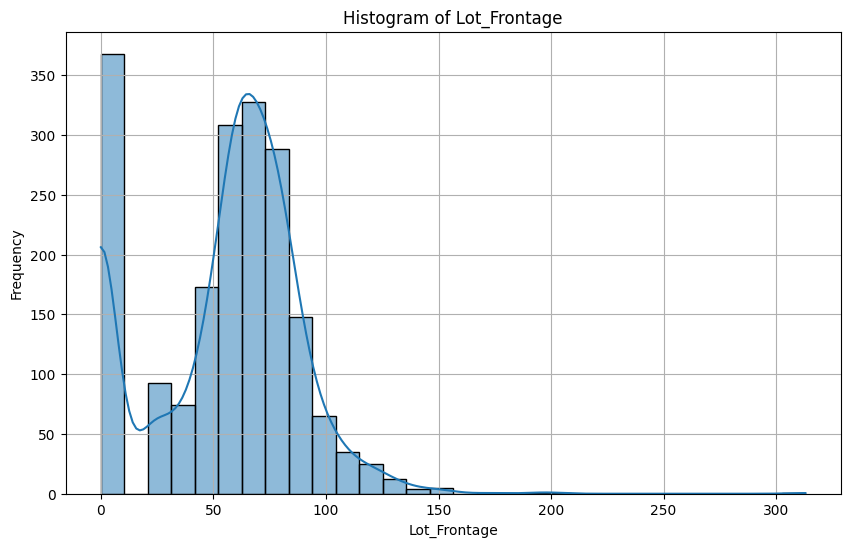

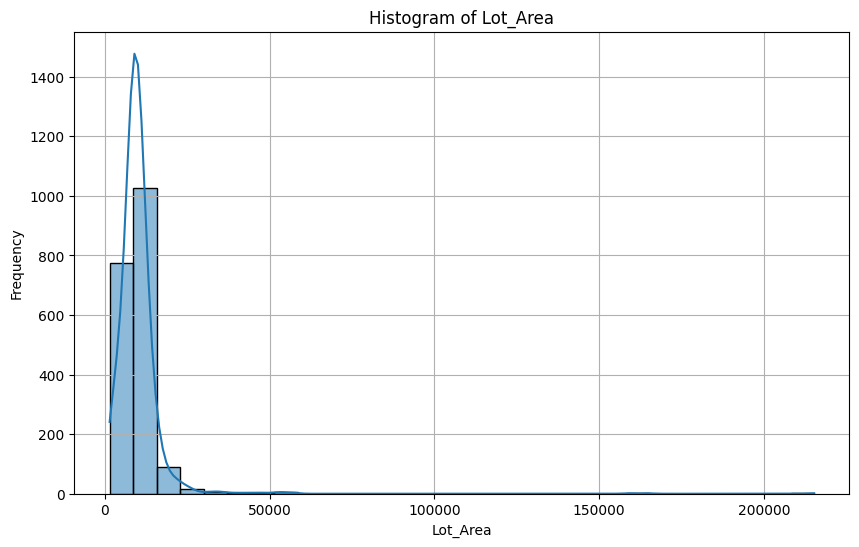

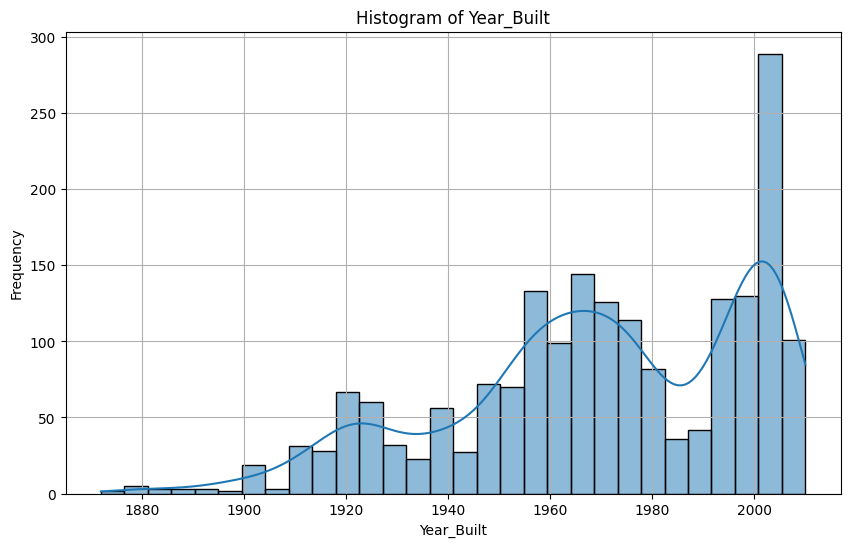

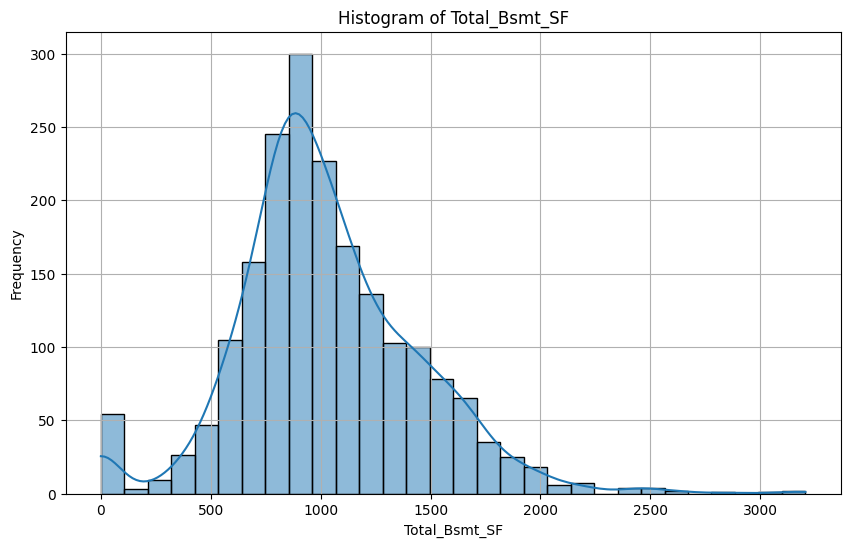

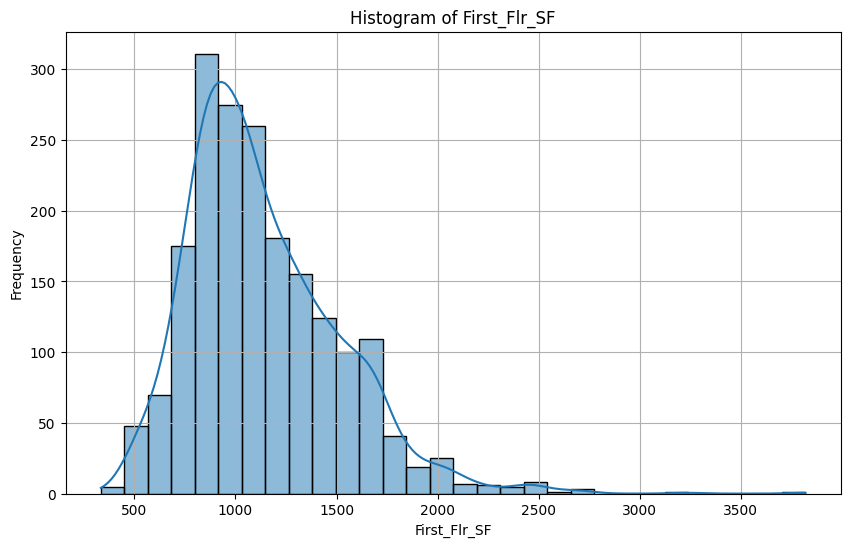

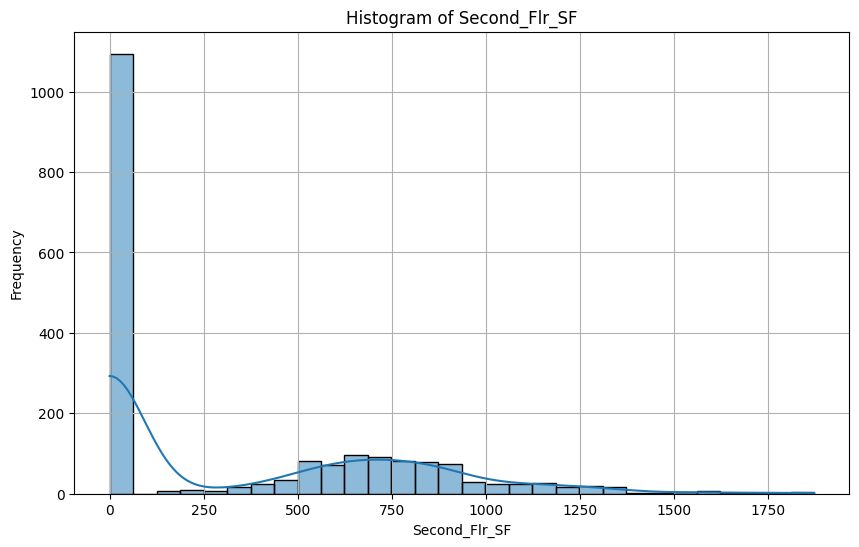

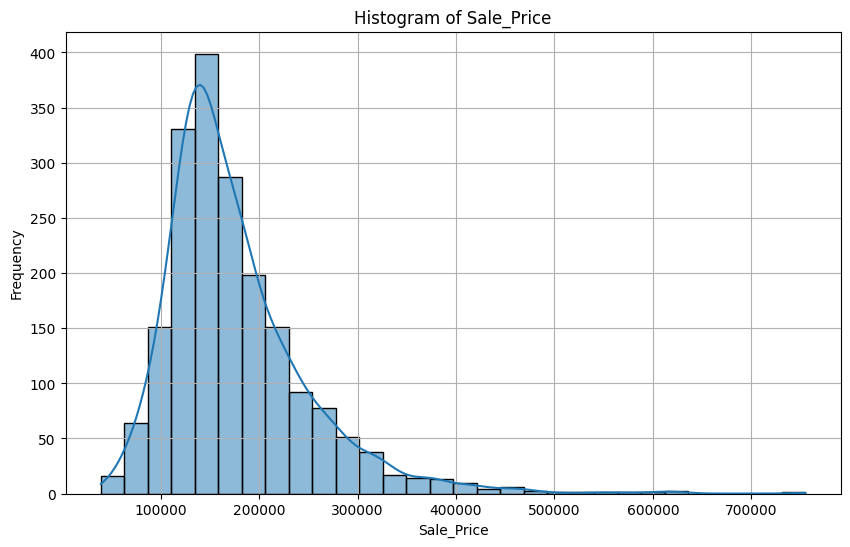

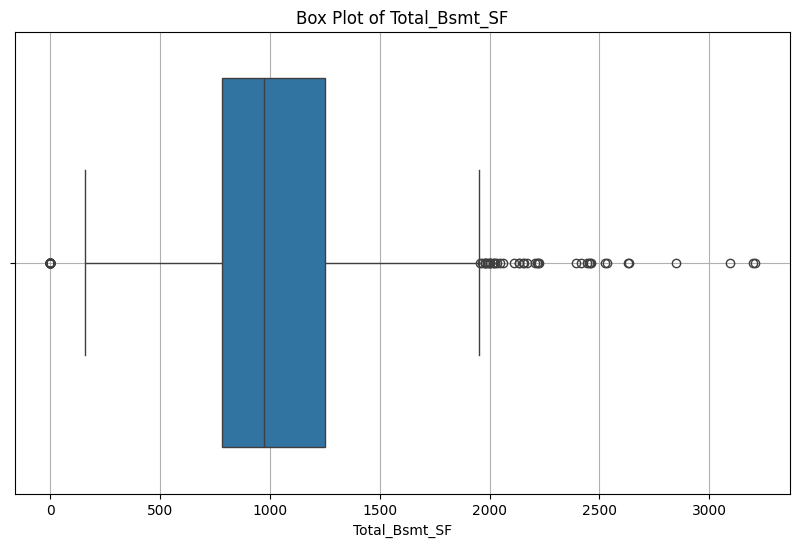

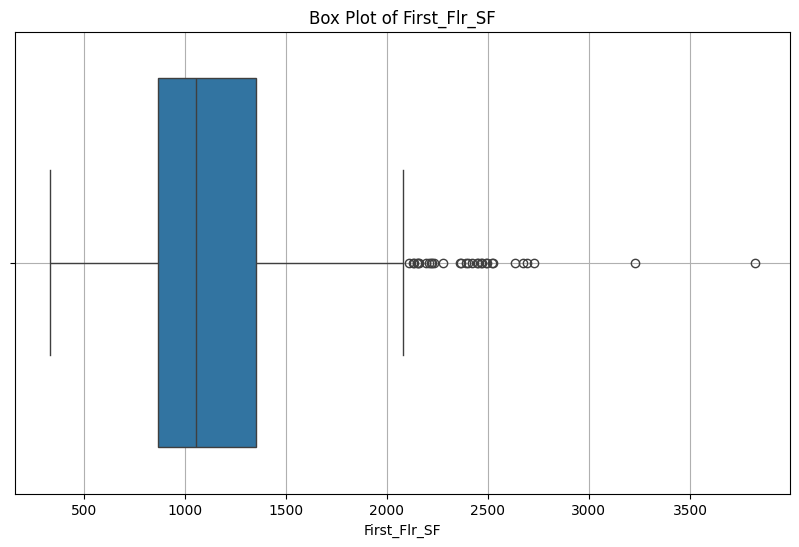

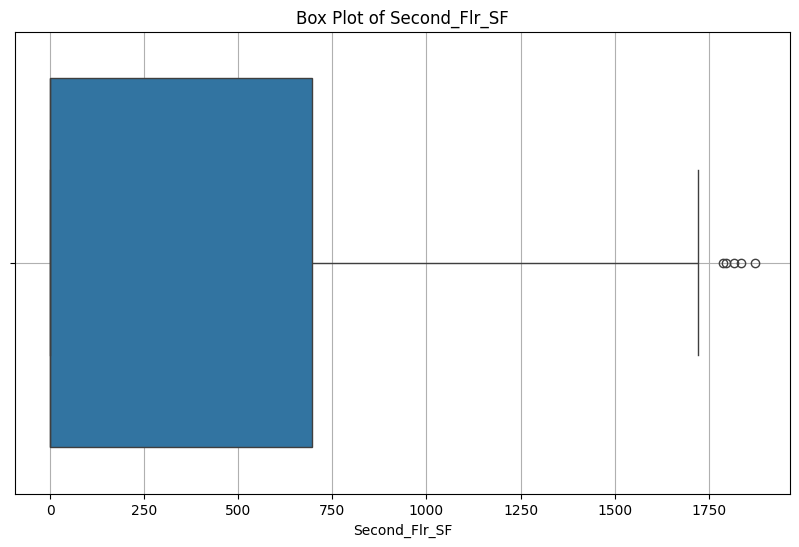

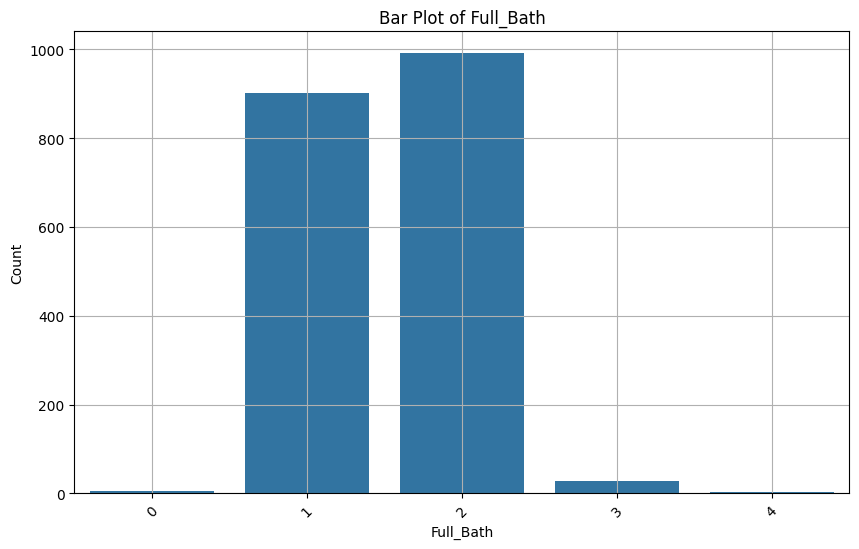

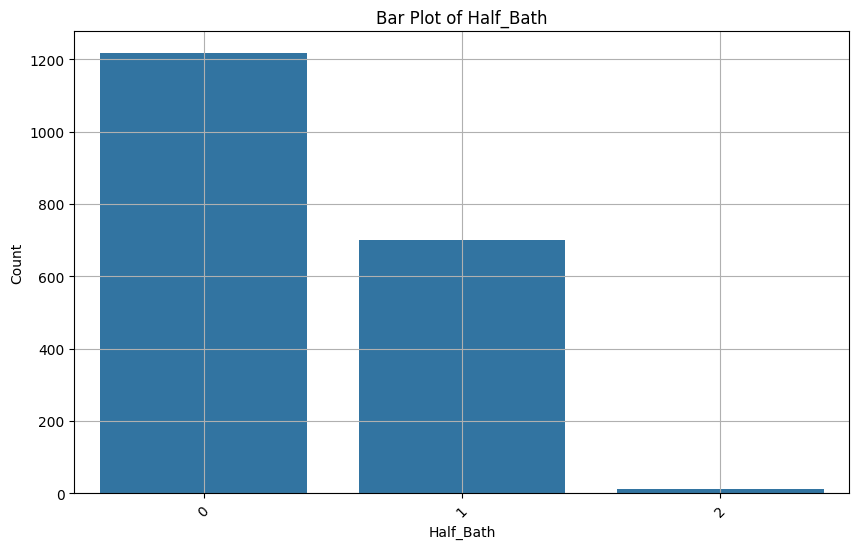

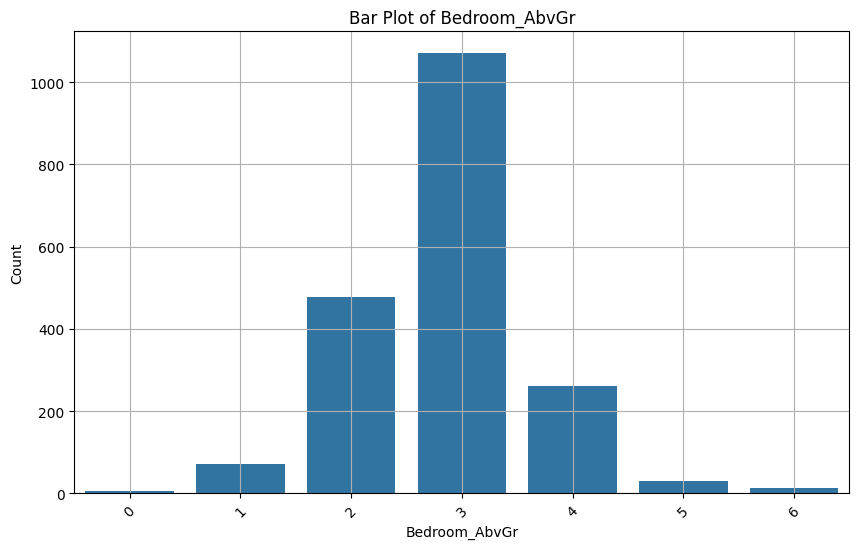

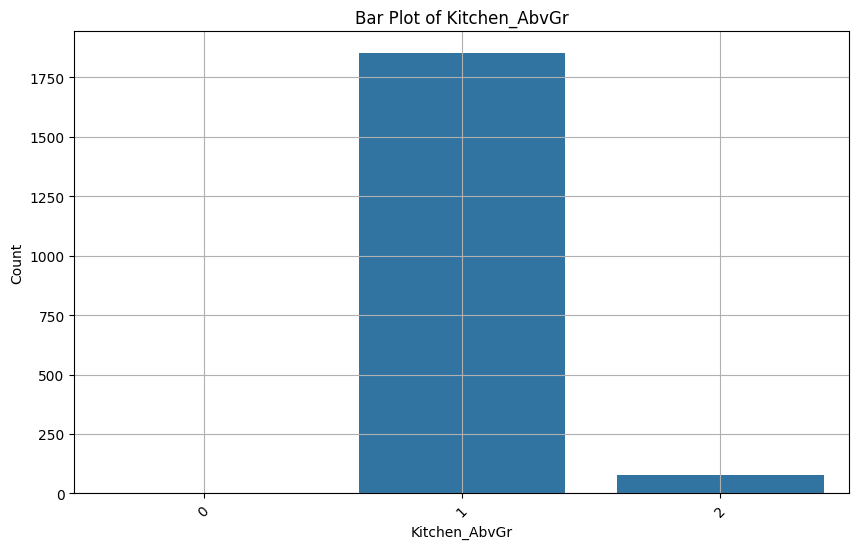

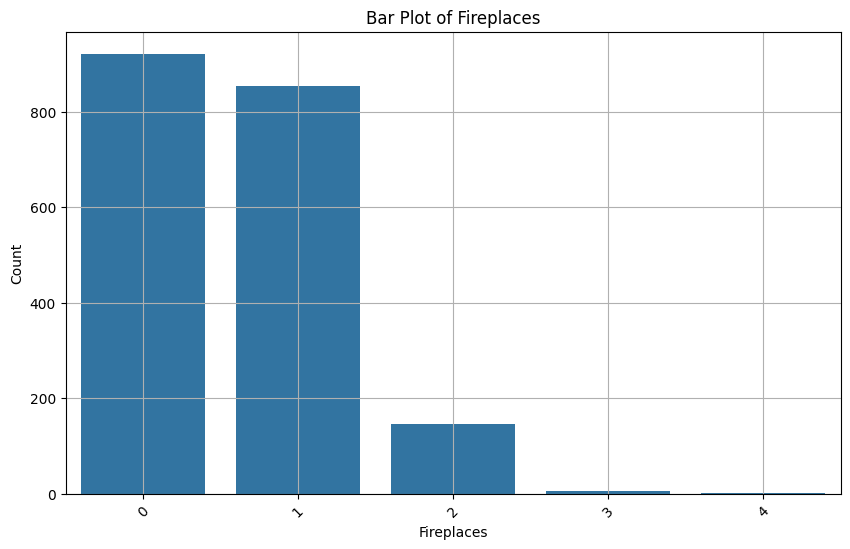

In [32]:
# Function to create histograms
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Function to create box plots
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

# Function to create bar plots
def plot_barplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col])
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Define the columns for graphical analysis
histogram_columns = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Sale_Price']
boxplot_columns = ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']
barplot_columns = ['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']

# Generate the plots
plot_histograms(train_df, histogram_columns)
plot_boxplots(train_df, boxplot_columns)
plot_barplots(train_df, barplot_columns)

#### __Multivariate Analysis__

Multivariate analysis explores relationships between two or more features/variables. This section will be focussed on understanding how the features in our dataset correlate with the target feature(Sales Price). This will help to understand which varibales are necessary or uself for my model training.

#### __Non-Graphical Multivariate Analysis__

Correlation Analysis:
Identify which numerical features are most correlated with Sale_Price.

In [38]:
# Create a list of numerical variables
numerical_features = ['Sale_Price', 'Lot_Frontage', 'Lot_Area', 'Year_Built', 
                      'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 
                      'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 
                      'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude']

# Compute the correlation matrix only for numerical features
corr_matrix = train_df[numerical_features].corr()

# Sort the correlation matrix by Sale_Price
correlation_with_target = corr_matrix['Sale_Price'].sort_values(ascending=False)
print(correlation_with_target)

Sale_Price       1.000000
Total_Bsmt_SF    0.648240
First_Flr_SF     0.644837
Full_Bath        0.540967
Year_Built       0.528365
Fireplaces       0.489734
Half_Bath        0.292630
Second_Flr_SF    0.290419
Lot_Area         0.272392
Latitude         0.245497
Bedroom_AbvGr    0.178386
Lot_Frontage     0.163115
Kitchen_AbvGr   -0.107611
Longitude       -0.258842
Name: Sale_Price, dtype: float64


From the various correlation co-efficients for each of the numerical variables, these are some of the inferences we can make:

Key Drivers: Features like basement size, first-floor size, number of full bathrooms, and the year the house was built are significant drivers of house prices.

Geographical Influence: Both latitude and longitude show correlations, hinting that location within the area studied has an impact on sale prices.

Outliers/Anomalies: The negative correlation with Longitude and Kitchen_AbvGr suggests that there might be specific location-related factors or market preferences influencing these features.

Groupby Analysis:
Group by categorical variables to compare average Sale_Price across different categories.

In [40]:
# Group by Bldg_Type and calculate the mean Sale_Price
avg_sale_price_by_bldg_type = train_df.groupby('Bldg_Type')['Sale_Price'].mean().sort_values(ascending=False)
print(avg_sale_price_by_bldg_type)

Bldg_Type
TwnhsE      183207.870968
OneFam      180089.353943
Duplex      142306.484375
Twnhs       137741.058824
TwoFmCon    127990.853659
Name: Sale_Price, dtype: float64


In [41]:
# Group by House_Style and calculate the mean Sale_Price
avg_sale_price_by_house_style = train_df.groupby('House_Style')['Sale_Price'].mean().sort_values(ascending=False)
print(avg_sale_price_by_house_style)

House_Style
Two_and_Half_Fin    285125.000000
Two_Story           198523.958333
Two_and_Half_Unf    183870.000000
One_Story           173039.798539
SLvl                169170.368421
SFoyer              142503.888889
One_and_Half_Fin    142106.478469
One_and_Half_Unf    106828.571429
Name: Sale_Price, dtype: float64


ANOVA (Analysis of Variance):
To check if the means of Sale_Price across different categories of categorical variables are significantly different.

In [43]:
from scipy.stats import f_oneway

# ANOVA for Sale_Price across different Bldg_Type
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("Bldg_Type")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 15.995156967151086, P-value: 6.875397050056259e-13


In [44]:
# ANOVA for Sale_Price across different House_Style
f_stat, p_value = f_oneway(*[group["Sale_Price"].values for name, group in train_df.groupby("House_Style")])
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 21.040251417889703, P-value: 1.849879928995216e-27


#### __Graphical Multivariate Analysis__

Pairplot:
A pairplot will help you visualize the relationships between multiple features and Sale_Price.

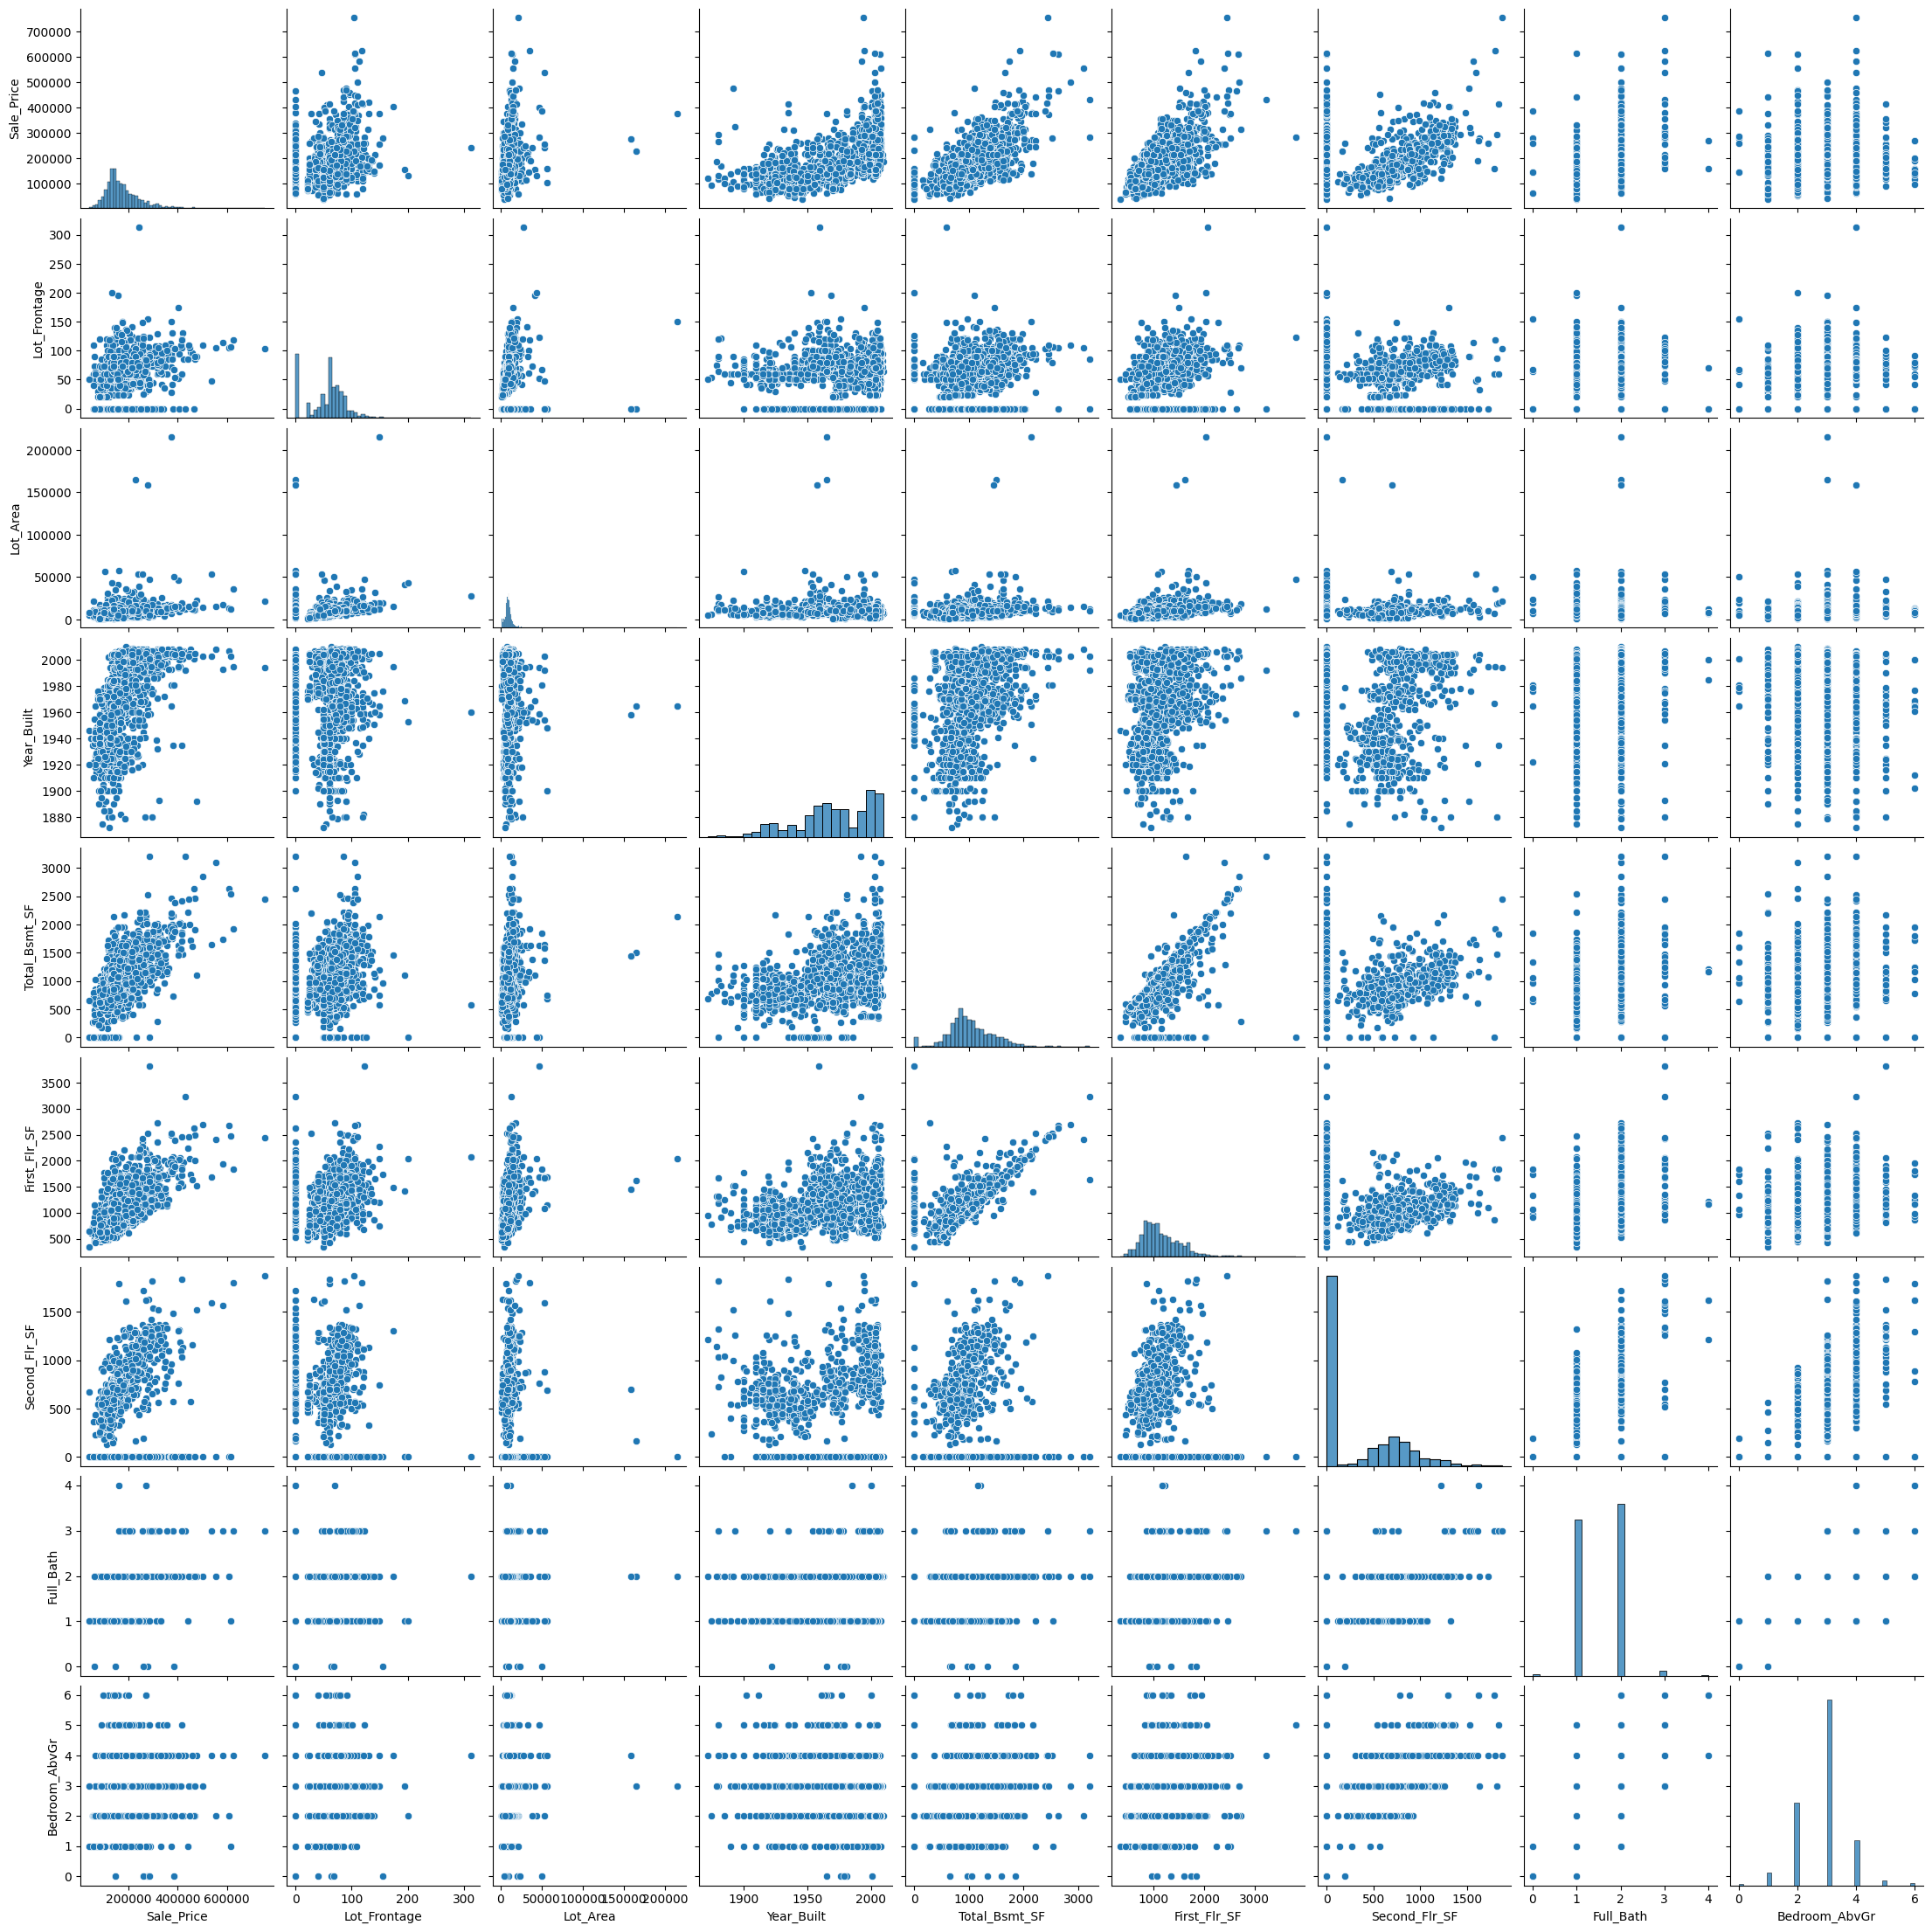

In [45]:
# Select relevant features for pairplot
selected_features = ['Sale_Price', 'Lot_Frontage', 'Lot_Area', 'Year_Built', 
                     'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 
                     'Full_Bath', 'Bedroom_AbvGr']

sns.pairplot(train_df[selected_features])
plt.show()

Correlation Heatmap:
To visualize the correlation between Sale_Price and other numerical features.

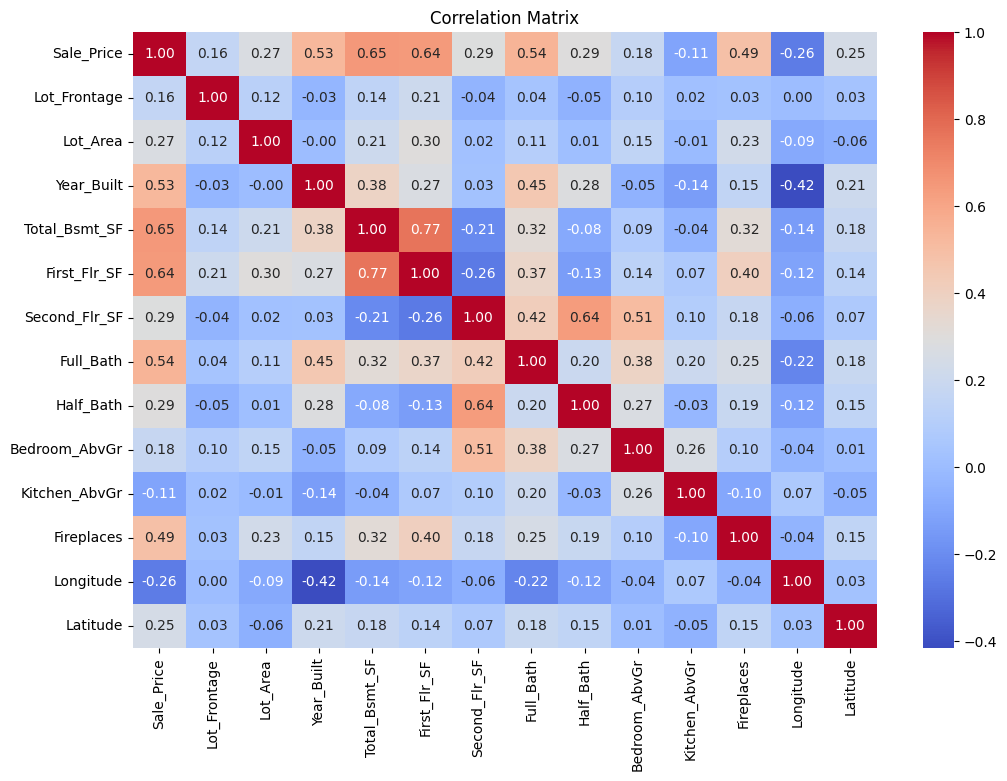

In [48]:
# Compute the correlation matrix for numerical features
corr_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

To see how categorical variables like Bldg_Type, House_Style, Overall_Cond, and Exter_Cond influence Sale_Price.

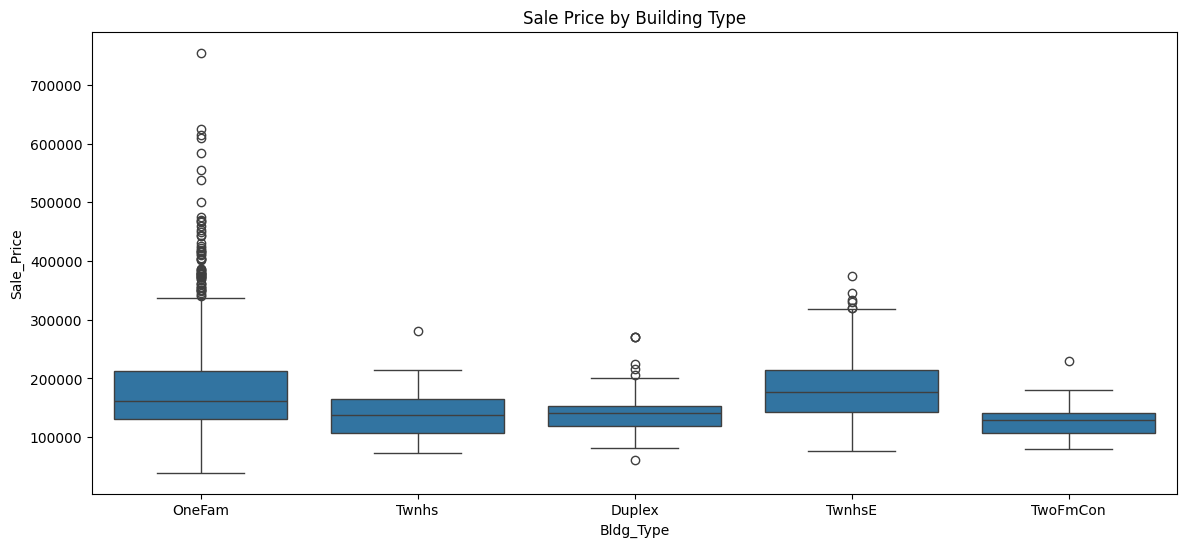

In [49]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Bldg_Type', y='Sale_Price', data=train_df)
plt.title('Sale Price by Building Type')
plt.show()

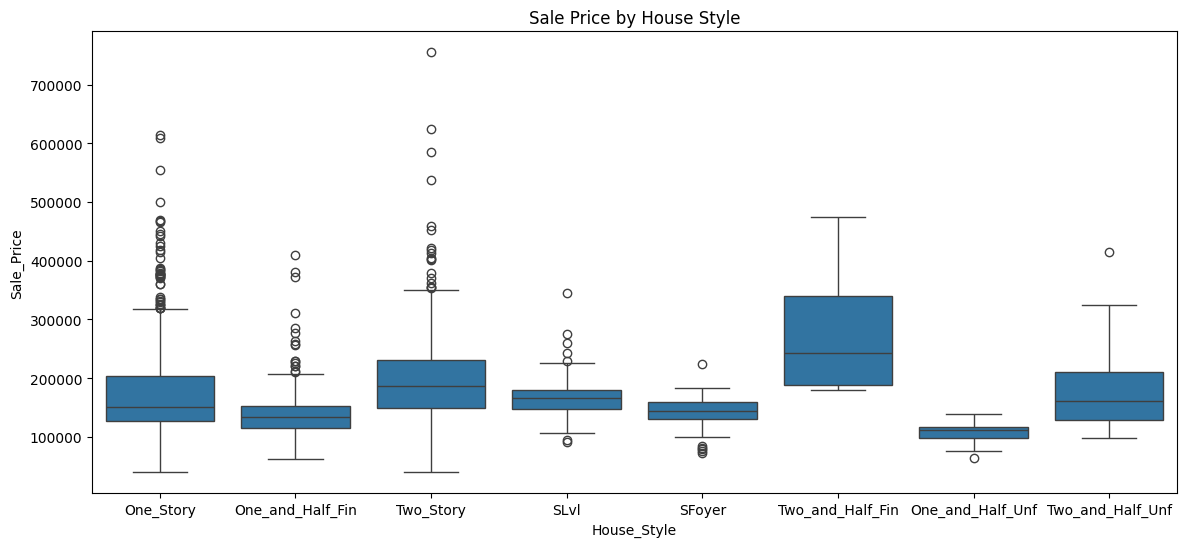

In [50]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='House_Style', y='Sale_Price', data=train_df)
plt.title('Sale Price by House Style')
plt.show()

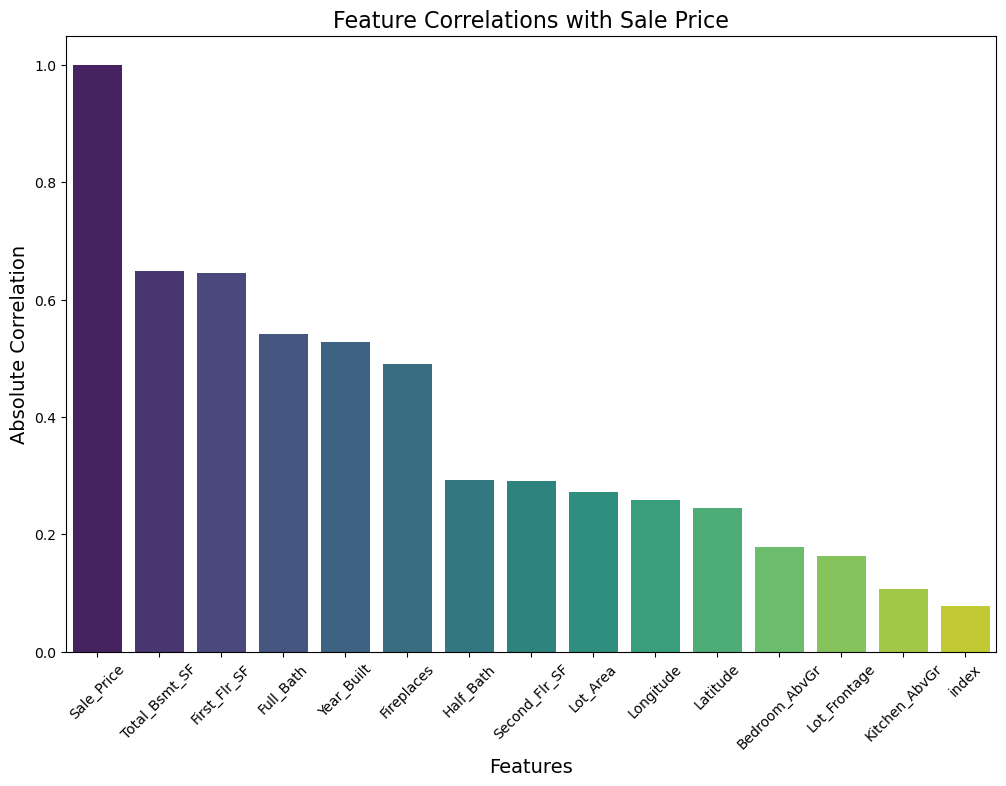

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Sale Price', fontsize=16)
plt.ylabel('Absolute Correlation', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tick_params(axis='x', rotation=45)

# Display the plot
plt.show()

We can say that the variables that has most effect on the sales price are Total square feet of basement area(Total_Bsmt_SF), First Floor square feet(First_Flr_SF), Full bathroom, Year built, fireplace.

Number of fireplaces can affect the price of a house. Typically, we can say that there is a potential increase in house prices with increase in the number of fireplaces. High number of fireplaces can also indicate high number of room spaces and fireplaces is a good selling point especially for houses in cold regions.

For the year built, we can see that as the year increases, so does the sales price increase. This is could be because modern houses will typically cost more than old one as the cost of construction, furnitures, finishes etc in modern house will cost more than that of old house and also the economy tends to detoriate the value of money.

For the Second Floor_SF, although houses with zero second floor still has houses with high price, we can still see that with an increase in the second floor square feet, there is an increase in the sales price. 
This feature also showed a weak correlation and this could be because there are bungalow houses that can be big, have all the features that can make a house expensive.

For the Total basement square feet, there is a clear incease in salesprice with increase in the total basement sf and this feature also showed a positive strong correlation with sales price. This could be due to many reasons:
- Basements add significant value to a property due to the additional space they provide, which can be used for various purposes like usable living space, such as extra bedrooms, family rooms, recreation rooms, home offices, or even rental units especially if it is finished and can be valuable for storage, workshops, or future finishing potential if not finished.

For the First floor Square feet, there is also a clear incease in salesprice with increase in thefirst floor sf and this feature also showed a positive strong correlation with sales price. This could be due to many reasons:
- Increased Living Space: The first floor typically contains essential living spaces such as the living room, kitchen, dining room, and sometimes bedrooms. Larger first-floor square footage means more spacious and potentially more numerous primary living areas, which can increase the home's overall appeal. More space on the first floor can accommodate larger furniture, more storage, and more comfortable living arrangements.

For the full bath, we can see that the more the number of full bathrooms, the more the sales price tend to go higher. This could also be for some reasons:
- Increased Convenience: More full bathrooms mean more convenience for the occupants, reducing waiting times and making morning and evening routines smoother, especially for larger families.
- Additional full bathrooms can better accommodate guests, making the home more hospitable.
- Homes with more full bathrooms are often perceived as more luxurious and comfortable, increasing their attractiveness to potential buyers.
